<a href="https://colab.research.google.com/github/santhoshbvsrk/DeepLearning/blob/main/ChurnModelling/ChurnModelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [113]:
df = pd.read_csv("https://raw.githubusercontent.com/santhoshbvsrk/DeepLearning/main/ChurnModelling/Churn_Modelling.csv")

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


Checking for Missing Values

In [5]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

Replacing Index with RowNumber column as it can be considered as Index.

In [ ]:
from pandas_profiling import ProfileReport

In [ ]:
CustomerChurn_profiling=ProfileReport(df, title='CustomerChurn_pandasprofiling_output', explorative=True)
CustomerChurn_profiling.to_file("CustomerChurn_pandasprofiling_output.html")

In [7]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
df[['Surname','Geography','Gender','Age']].value_counts(ascending=False)

Surname   Geography  Gender  Age
Wright    Germany    Female  48     3
Genovesi  France     Female  33     3
Tien      France     Male    34     3
Chinedum  France     Male    34     3
Smith     France     Male    37     3
                                   ..
Nwebube   Spain      Male    37     1
                             34     1
          Germany    Male    44     1
          France     Male    37     1
Abazu     Spain      Female  28     1
Length: 9759, dtype: int64

In [9]:
df[(df.Surname=='Wright') & (df.Geography=='Germany') & (df.Gender=='Female') & (df.Age==48)]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
4021,4022,15697100,Wright,772,Germany,Female,48,6,108736.52,1,1,0,184564.67,1
8910,8911,15744873,Wright,657,Germany,Female,48,5,143595.87,1,0,0,101314.65,1
9218,9219,15806318,Wright,676,Germany,Female,48,2,124442.38,1,1,0,15068.53,1


Dropping RowNumber, Surname & CustomerId as those doesn't have impact in determining if Customer is leaving the bank or not.

In [114]:
df.drop(columns=['RowNumber','CustomerId','Surname'], inplace=True)

In [11]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Checking for Missing Values

In [12]:
df.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


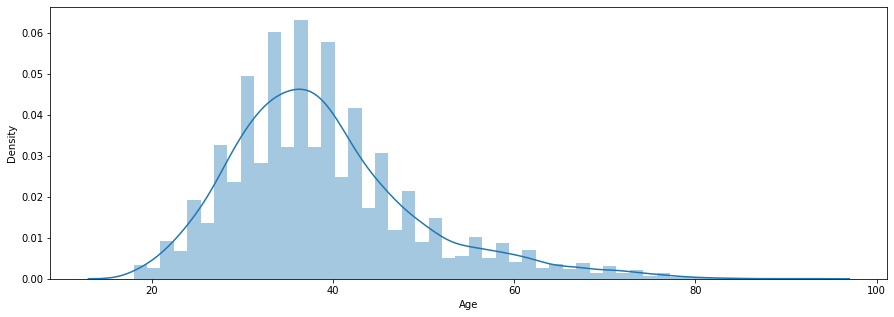

In [21]:
plt.figure(figsize=(15,5))
sns.distplot(a=df['Age'],hist=True,kde=True)

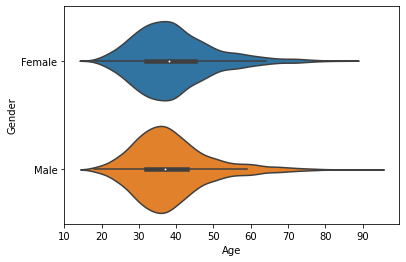

In [25]:
sns.violinplot(x=df['Age'],y=df['Gender'])

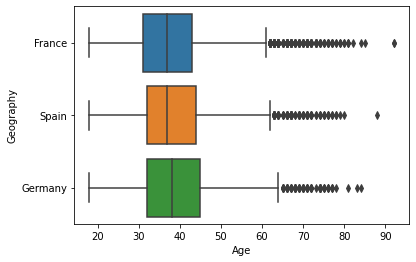

In [28]:
sns.boxplot(x=df['Age'],y=df['Geography'])

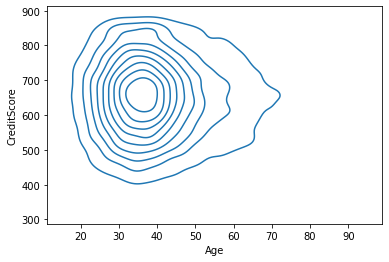

In [34]:
sns.kdeplot(x=df['Age'], y=df['CreditScore'])

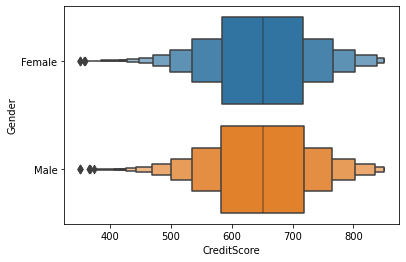

In [41]:
sns.boxenplot(y='Gender',x='CreditScore',data=df)

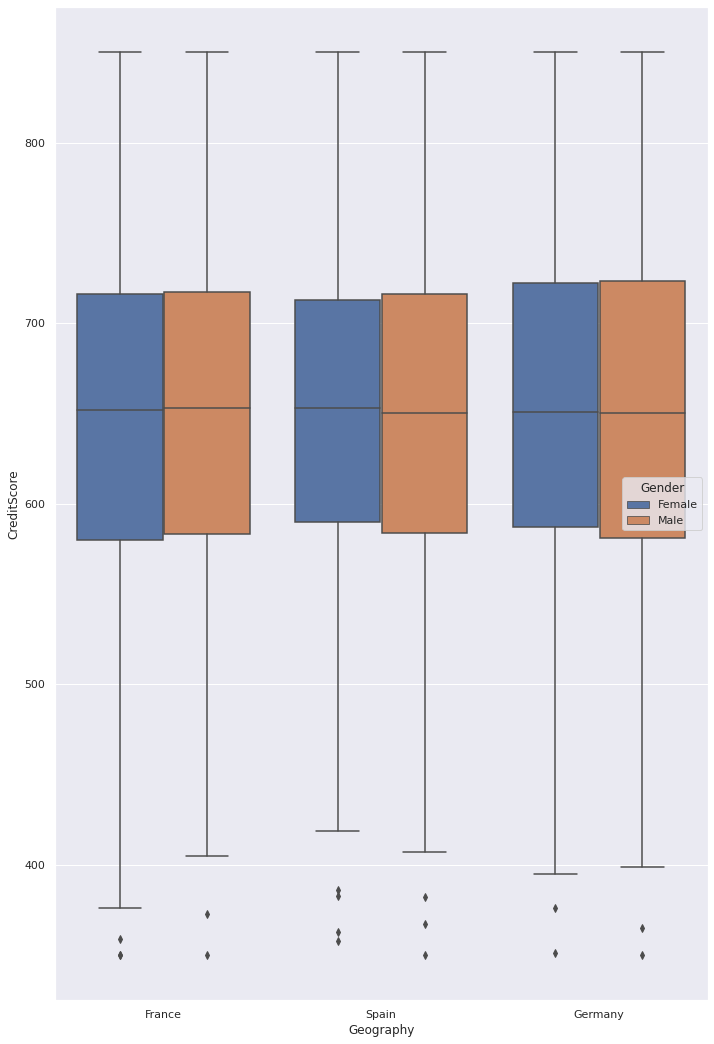

In [58]:
sns.boxplot(x='Geography',y='CreditScore',data=df,hue='Gender')
sns.set(rc={'figure.figsize':(11.7,18.27)})

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


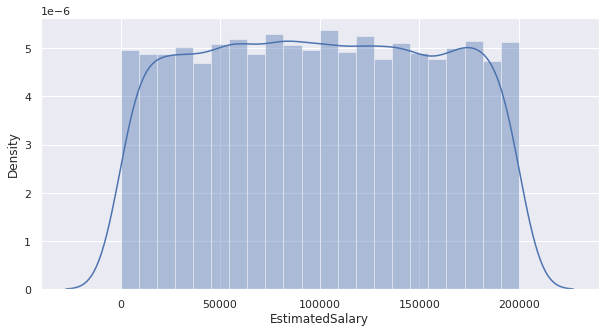

In [69]:
plt.figure(figsize=(10,5))
sns.distplot(a=df['EstimatedSalary'])

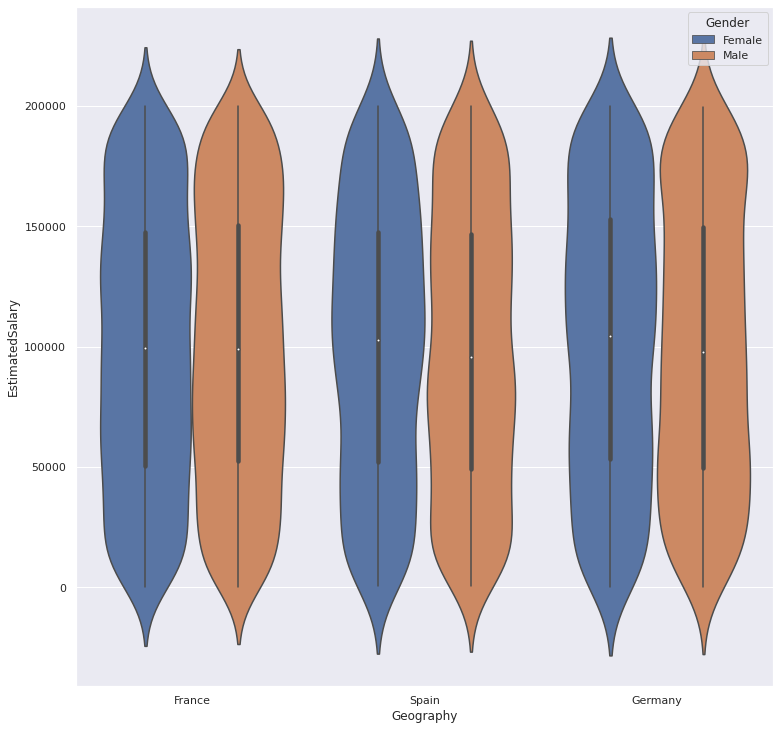

In [81]:
plt.figure(figsize=(12.5,12.5))
sns.violinplot(x=df['Geography'],y=df['EstimatedSalary'],hue=df['Gender'])

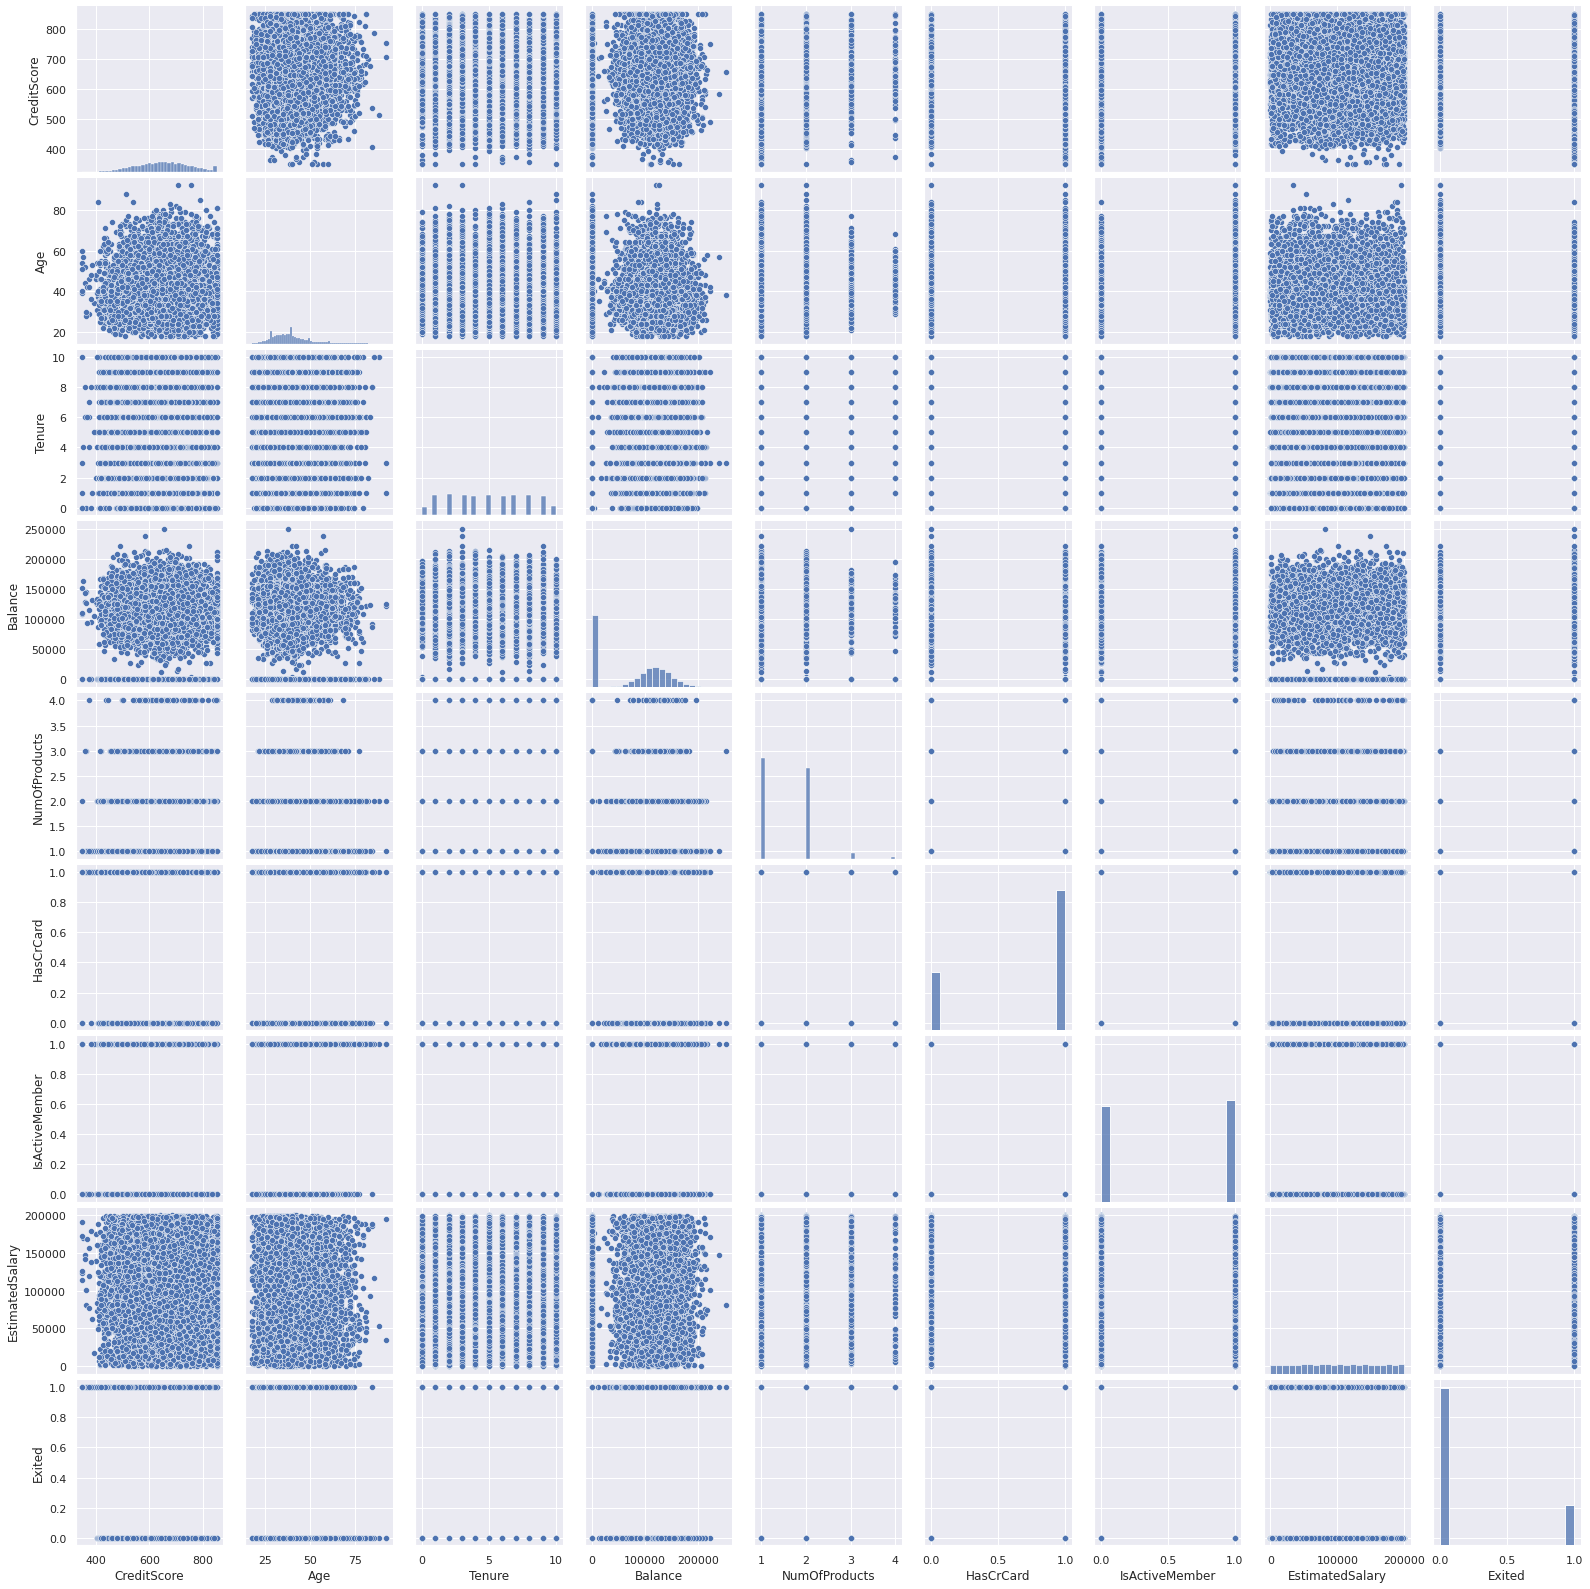

In [82]:
sns.pairplot(data=df)

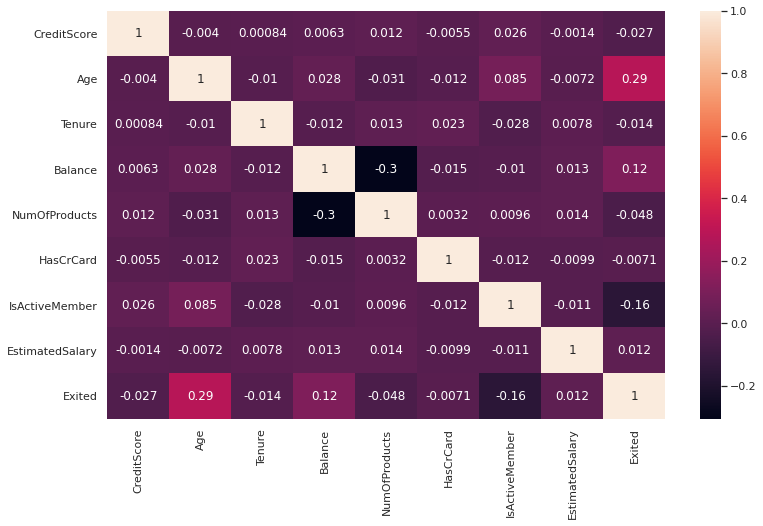

In [90]:
plt.figure(figsize=(12.5,7.5))
sns.heatmap(data=df.corr(),annot=True)

**NOTE**: Here 1 means YES & 0 means NO

In [91]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


* We've 2 categorical columns now Gender & Geography.
* Let us split the data into source & target variables and perform Categorical Encoding.
* Let us do Label Encoding for Gender & OneHotEncoding for Geography.

In [118]:
x = df.drop(labels='Exited',axis=1)
y=df['Exited']

In [117]:
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [119]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [120]:
x['Gender'] = x['Gender'].astype('category')
x['Gender'] = x['Gender'].cat.codes

In [121]:
x['Gender'].value_counts()

1    5457
0    4543
Name: Gender, dtype: int64

In [122]:
x = pd.get_dummies(x,columns=['Geography'])

In [123]:
x.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,1


Train Test Split

In [124]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 0)

In [125]:
x_train.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
7389,667,0,34,5,0.00,2,1,0,163830.64,0,0,1
9275,427,1,42,1,75681.52,1,1,1,57098.00,0,1,0
2995,535,0,29,2,112367.34,1,1,0,185630.76,1,0,0
5316,654,1,40,5,105683.63,1,1,0,173617.09,0,0,1
356,850,0,57,8,126776.30,2,1,1,132298.49,0,0,1


In [126]:
y_train.head()

7389    0
9275    0
2995    0
5316    0
356     0
Name: Exited, dtype: int64

In [127]:
x_test.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
9394,597,0,35,8,131101.04,1,1,1,192852.67,0,1,0
898,523,0,40,2,102967.41,1,1,0,128702.10,1,0,0
2398,706,0,42,8,95386.82,1,1,1,75732.25,0,0,1
5906,788,1,32,4,112079.58,1,0,0,89368.59,1,0,0
2343,706,1,38,5,163034.82,2,1,1,135662.17,0,1,0


In [128]:
y_test.head()

9394    0
898     1
2398    0
5906    0
2343    0
Name: Exited, dtype: int64

As the values across variables are in different scales let us Standardize them.

In [129]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [131]:
x_train

array([[ 0.16958176, -1.09168714, -0.46460796, ..., -1.01460667,
        -0.5698444 ,  1.74309049],
       [-2.30455945,  0.91601335,  0.30102557, ..., -1.01460667,
         1.75486502, -0.57369368],
       [-1.19119591, -1.09168714, -0.94312892, ...,  0.98560362,
        -0.5698444 , -0.57369368],
       ...,
       [ 0.9015152 ,  0.91601335, -0.36890377, ...,  0.98560362,
        -0.5698444 , -0.57369368],
       [-0.62420521, -1.09168714, -0.08179119, ..., -1.01460667,
        -0.5698444 ,  1.74309049],
       [-0.28401079, -1.09168714,  0.87525072, ..., -1.01460667,
         1.75486502, -0.57369368]])

Now, let us build an Artifical Neural Network 

Import Tensorflow package and import Keras API from Tensorflow package

In [135]:
import tensorflow as tf
from tensorflow import keras

In [134]:
from keras import models         #importing models package from Keras
from keras import Sequential     #importing Sequential package from Keras to create a Sequential model
from keras import layers         #importing layers package from Keras which will be used for adding Input Layers, Hidden Layers & Output Layers

Add Layers now i.e., Input Layer & first Hidden Layer

In [ ]:
ann.add(layer.Dense)